In [6]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt, os, glob

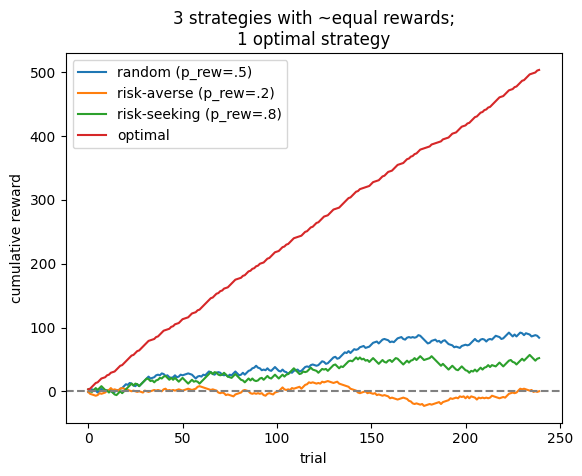

In [7]:
strategies = {'random (p_rew=.5)': 0.5, 'risk-averse (p_rew=.2)': 0.2, 'risk-seeking (p_rew=.8)': 0.8, 'optimal': 'optimal'}

n_trials = 240
stim = np.random.randint(0,2,size=n_trials)

def simulate(strategies_val):
    if strategies_val == 'optimal':
        choice = stim.astype(bool)  # choice equals stim for optimal strategy
    else:
        choice = np.random.rand(n_trials) < strategies_val
    # payoffs: if stim=0 → +1 (choice=0) else -3; if stim=1 → +3 (choice=1) else -1
    outcome = np.where(
        stim==0,
        np.where(~choice, 1,  -3),
        np.where(choice,  3, -1)
    )
    return np.cumsum(outcome)

for name, prob in strategies.items():
    plt.plot(simulate(prob), label=name)

plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('trial')
plt.ylabel('cumulative reward')
plt.legend()
plt.title('3 strategies with ~equal rewards;\n1 optimal strategy')
plt.show()



next, say stim vals can be in [-3.9, 3.9]; and same for choice  

if 3 < |stim|, choice dist centered at stim  

elif 1 < |stim| < 3, choice dist centered at stim/|stim|  

elif |stim| < 1,  

    if agent == random,
        choice centered at 0  

    elif agent == risk_averse,  
        choice centered at -.5

    elif agent == risk_seeking
        choice centered at .5

    elif agent == optimal
        choice centered at stim


plot choice distributions of each agent across 2*2 subplots

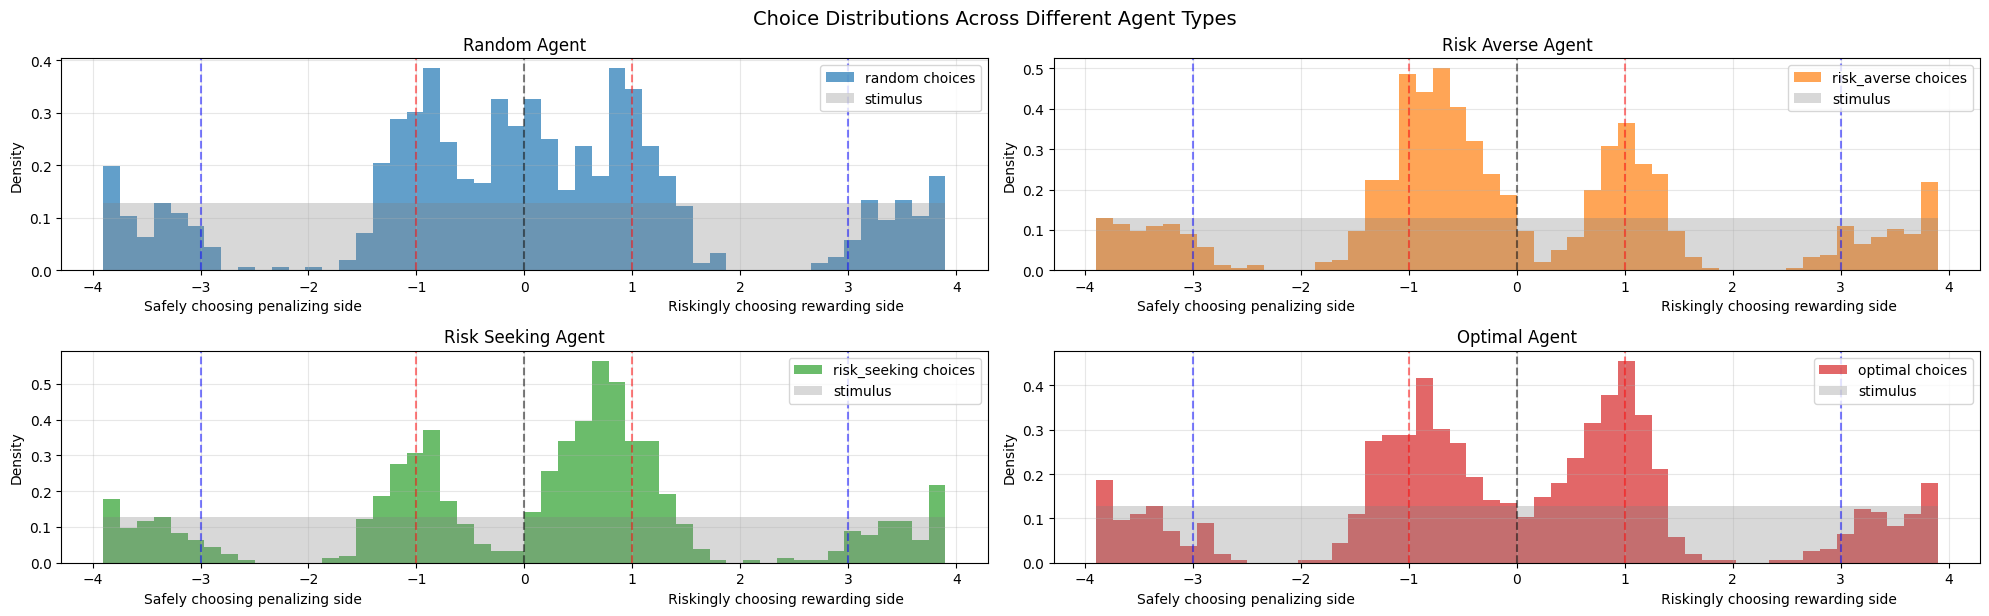

Summary Statistics:
--------------------------------------------------
random      : mean= 0.007, std= 1.837
risk_averse : mean=-0.108, std= 1.836
risk_seeking: mean= 0.131, std= 1.844
optimal     : mean=-0.005, std= 1.851


In [8]:
# Extended game with continuous values
np.random.seed(42)  # for reproducible results
n_trials = 1000

# Generate stimulus values uniformly distributed in [-3.9, 3.9]
stim_vals = np.linspace(-3.9, 3.9, n_trials)

agents = ['random', 'risk_averse', 'risk_seeking', 'optimal']
choice_data = {}

def get_choice_center(stim, agent):
    """Determine the center of choice distribution based on stimulus and agent"""
    abs_stim = np.abs(stim)
    
    if abs_stim > 3:
        return stim  # choice centered at stim
    elif 1 < abs_stim < 3:
        return stim / abs_stim  # choice centered at stim/|stim| (±1)
    else:  # |stim| < 1
        if agent == 'random':
            return 0
        elif agent == 'risk_averse':
            return -0.5
        elif agent == 'risk_seeking':
            return 0.5
        elif agent == 'optimal':
            return stim
    
# Generate choice distributions for each agent
for agent in agents:
    choices = []
    for stim in stim_vals:
        center = get_choice_center(stim, agent)
        # Add some noise around the center (normal distribution with std=0.3)
        choice = np.random.normal(center, 0.3)
        # Clip to [-3.9, 3.9] range
        choice = np.clip(choice, -3.9, 3.9)
        choices.append(choice)
    choice_data[agent] = np.array(choices)

# Create 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 6))
axes = axes.flatten()

for i, agent in enumerate(agents):
    ax = axes[i]
    
    # Plot choice distribution
    ax.hist(choice_data[agent], bins=50, alpha=0.7, density=True, 
            color=plt.cm.tab10(i), label=f'{agent} choices')
    
    # Plot stimulus distribution for reference
    ax.hist(stim_vals, bins=50, alpha=0.3, density=True, 
            color='gray', label='stimulus')
    
    ax.set_title(f'{agent.replace("_", " ").title()} Agent')
    ax.set_xlabel('Safely choosing penalizing side                                                                      Riskingly choosing rewarding side')
    ax.set_ylabel('Density')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Add vertical lines at key values
    ax.axvline(0, color='black', linestyle='--', alpha=0.5)
    ax.axvline(-1, color='red', linestyle='--', alpha=0.5)
    ax.axvline(1, color='red', linestyle='--', alpha=0.5)
    ax.axvline(-3, color='blue', linestyle='--', alpha=0.5)
    ax.axvline(3, color='blue', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.suptitle('Choice Distributions Across Different Agent Types', y=1.02, fontsize=14)
plt.show()

# Print summary statistics
print("Summary Statistics:")
print("-" * 50)
for agent in agents:
    mean_choice = np.mean(choice_data[agent])
    std_choice = np.std(choice_data[agent])
    print(f"{agent:12}: mean={mean_choice:6.3f}, std={std_choice:6.3f}")

```
1. theres some stim_pos, ranging from -.38 to .38, multiple of .04
        there is some stim_noise, which may decrease with |stim_pos|
2. there is div_pos = 0
3. asymmetric #coins are gained or lost based whether output is on the same side of div_pos as stim_pos. specifically, payoffs:
        true_neg, true_pos, false_neg, false_pos = 1, 3, -1, -3
4. decision depends on stim strength, payoffs, and risk_prone (free param). specifically,
        a. risk_prone = seeking if > 0, averse if < 0
        b. decision = (rp * 1 * stim_pos) + (rp * 3 * stim_pos) > 0
        b. H2: decision = (-1*stim_pos) + (-3*stim_pos) > 0
        tho, there is some incentive for output to stick to original stim location, stim_stick, which increases with |stim_pos|
4. goal is maximizing coins.
        there is valence, which 
        there is risk_prone, which if > means agent is risk seeking, if < means agent is risk averse

scratch
* when uncertain, and choosing to risk, is that an expected value computation (distance * weight)